In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sp

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
ct_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined_df = pd.merge(ct_df, mouse_df,  on = "Mouse ID")

# Display the data table for preview
combined_df.head()
index=np.arange(0, 50, 5)
index

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45])

## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
drug_tp_groupby = combined_df.groupby(["Drug", "Timepoint"])
# Convert to DataFrame
drug_bytp_mean = drug_tp_groupby.mean().reset_index()
# Preview DataFrame
drug_bytp_mean.head()

,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.160000
2,Capomulin,10,43.084291,0.320000
3,Capomulin,15,42.064317,0.375000
4,Capomulin,20,40.716325,0.652174


In [3]:
test_df = drug_tp_groupby.mean()
mean_unstacked_df = test_df.unstack("Drug")
mean_unstacked_df.head()


Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   

                                                                  \
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol   
Timepoint                                                          
0          45.000000  45.000000  45.000000  45.000000  45.000000   
5          47.125589  47.248967  43.944859  47.527452  46.851818   
10         49.423329  49.101541  42.531957  49.463844  48.689881   
15         51.359742  51.067318  41.495061  51.529409  50.779059   
20         54.364417  53.346737  40.238325  54.067395  53.170334   

          Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.160000  0.380952  0.280000  0.304348  0.260870  0.375000   
10                0.320000  0.600000  0.666667  0.590909  0.523810  0.833333   
15                0.375000  0.789474  0.904762  0.842105  0.857143  1.250000   
20                0.652174  1.111111  1.050000  1.210526  1.150000  1.526316   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.320000  0.120000  0.240000  0.166667  
10         0.565217  0.250000  0.478261  0.500000  
15         0.764706  0.333333  0.782609  0.809524  
20         1.000000  0.347826  0.952381  1.294118

In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_groupby = drug_tp_groupby.sem()

# Convert to DataFrame
sem_drug_timepoint_df = sem_groupby.reset_index()
# Preview DataFrame
sem_drug_timepoint_df.head()
sem_unstack_df = sem_groupby.unstack("Drug")
sem_unstack_df.head()

Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.074833  0.108588  0.091652  0.098100  0.093618  0.100947   
10                0.125433  0.152177  0.159364  0.142018  0.163577  0.115261   
15                0.132048  0.180625  0.194015  0.191381  0.158651  0.190221   
20                0.161621  0.241034  0.234801  0.236680  0.181731  0.234064   

                                                   ... Tumor Volume (mm3)  \
Drug       Propriva  Ramicane  Stelasyn Zoniferol  ...          Capomulin   
Timepoint                                          ...                      
0          0.000000  0.000000  0.000000  0.000000  ...           0.000000   
5          0.095219  0.066332  0.087178  0.077709  ...           0.448593   
10         0.105690  0.090289  0.123672  0.109109  ...           0.702684   
15         0.136377  0.115261  0.153439  0.111677  ...           0.838617   
20         0.171499  0.119430  0.200905  0.166378  ...           0.909731   

                                                                       \
Drug       Ceftamin Infubinol  Ketapril  Naftisol   Placebo  Propriva   
Timepoint                                                               
0          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5          0.164505  0.235102  0.264819  0.202385  0.218091  0.231708   
10         0.236144  0.282346  0.357421  0.319415  0.402064  0.376195   
15         0.332053  0.357705  0.580268  0.444378  0.614461  0.466109   
20         0.359482  0.476210  0.726484  0.595260  0.839609  0.555181   

                                         
Drug       Ramicane  Stelasyn Zoniferol  
Timepoint                                
0          0.000000  0.000000  0.000000  
5          0.482955  0.239862  0.188950  
10         0.720225  0.433678  0.263949  
15         0.770432  0.493261  0.370544  
20         0.786199  0.621889  0.533182  

[5 rows x 30 columns]

In [5]:
# Minor Data Munging to Re-Format the Data Frames
sem_by_tp= sem_drug_timepoint_df.set_index(["Timepoint", "Drug"])
sem_by_tp = sem_by_tp.drop(["Metastatic Sites","Mouse ID"], axis = 1)
# Preview that Reformatting worked

In [28]:
mean_unstacked_df[("Tumor Volume (mm3)")].head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [7]:
sem_reset = sem_by_tp.reset_index()
sem_reset = sem_reset.set_index("Timepoint")
sem_reset.head()

,Drug,Tumor Volume (mm3)
Timepoint,,
0,Capomulin,0.000000
5,Capomulin,0.448593
10,Capomulin,0.702684
15,Capomulin,0.838617
20,Capomulin,0.909731


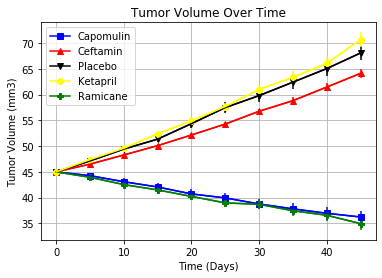

In [8]:
# Generate the Plot (with Error Bars)
plt.grid()
t_capomulin, = plt.plot(mean_unstacked_df.loc[:,('Tumor Volume (mm3)','Capomulin')],
                        marker = "s", color="blue", label = "Capomulin")

plt.errorbar(index, mean_unstacked_df.loc[:,('Tumor Volume (mm3)','Capomulin')], 
             sem_unstack_df.loc[:,('Tumor Volume (mm3)','Capomulin')], color = "blue")

t_ceftamin, = plt.plot(mean_unstacked_df.loc[:,('Tumor Volume (mm3)','Ceftamin')],
                       marker = "^", color = "red", label = "Ceftamin")

plt.errorbar(index, mean_unstacked_df.loc[:,('Tumor Volume (mm3)','Ceftamin')], 
             sem_unstack_df.loc[:,('Tumor Volume (mm3)','Ceftamin')], color = "red")

t_placebo, = plt.plot(mean_unstacked_df.loc[:,('Tumor Volume (mm3)','Placebo')],
                      marker = "v", color = "black", label = "Placebo")

plt.errorbar(index, mean_unstacked_df.loc[:,('Tumor Volume (mm3)','Placebo')], 
             sem_unstack_df.loc[:,('Tumor Volume (mm3)','Placebo')], color = "black")

t_ramicane, = plt.plot(mean_unstacked_df.loc[:,('Tumor Volume (mm3)','Ramicane')],
                        marker = "P", color = "green", label = "Ramicane")

plt.errorbar(index, mean_unstacked_df.loc[:,('Tumor Volume (mm3)','Ramicane')], 
             sem_unstack_df.loc[:,('Tumor Volume (mm3)','Ramicane')], color = "green")

t_ketapril, = plt.plot(mean_unstacked_df.loc[:,('Tumor Volume (mm3)','Ketapril')],
                       marker = "8", color = "yellow", label = "Ketapril")

plt.errorbar(index, mean_unstacked_df.loc[:,('Tumor Volume (mm3)','Ketapril')], 
             sem_unstack_df.loc[:,('Tumor Volume (mm3)','Ketapril')], color = "yellow")

plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume Over Time")

plt.legend(handles=[t_capomulin, t_ceftamin, t_placebo, t_ketapril, t_ramicane])
plt.savefig("../Figures/Tumor_Volume.png")

In [9]:
# ttest
(t_stat, p) = sp.ttest_ind(mean_unstacked_df.loc[:,('Metastatic Sites','Capomulin')], 
                           mean_unstacked_df.loc[:,('Metastatic Sites','Placebo')], equal_var=False)
if p < 0.05:
    print("The differences between Capomulin and the placebo are significant.")
else:
    print("The differences between Capomulin and placebo are due to chance.")
    

The differences between Capomulin and the placebo are significant.


In [10]:
(t_stat, p) = sp.ttest_ind(mean_unstacked_df.loc[:,('Metastatic Sites','Ceftamin')], 
                           mean_unstacked_df.loc[:,('Metastatic Sites','Placebo')], equal_var=False)
if p < 0.05:
    print("The differences between Ceftamin and the placebo are significant.")
else:
    print("The differences between Ceftamin and placebo are due to chance.")
print(p)

The differences between Ceftamin and placebo are due to chance.
0.41434251242568265


## Metastatic Response to Treatment

In [11]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_unstacked_df["Metastatic Sites"].head()
# Preview DataFrame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [12]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Preview DataFrame

sem_unstack_df["Metastatic Sites"].head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


In [13]:
mean_unstacked_df[("Metastatic Sites")]

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [14]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked
mean_unstacked_df[("Metastatic Sites")]

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


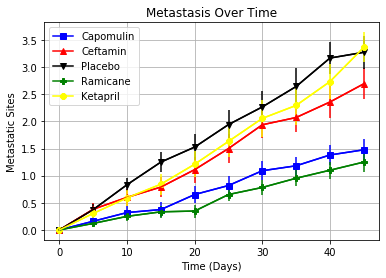

In [15]:
# Generate the Plot (with Error Bars)
plt.grid()
m_capomulin, = plt.plot(mean_unstacked_df.loc[:,('Metastatic Sites','Capomulin')],
                        marker = "s", color = "blue", label = "Capomulin")

plt.errorbar(index, mean_unstacked_df.loc[:,('Metastatic Sites','Capomulin')], 
             sem_unstack_df.loc[:,('Metastatic Sites','Capomulin')], color = "blue")

m_ceftamin, = plt.plot(mean_unstacked_df.loc[:,('Metastatic Sites','Ceftamin')],
                       marker = "^", color = "red", label = "Ceftamin")

plt.errorbar(index, mean_unstacked_df.loc[:,('Metastatic Sites','Ceftamin')], 
             sem_unstack_df.loc[:,('Metastatic Sites','Ceftamin')], color = "red")

m_placebo, = plt.plot(mean_unstacked_df.loc[:,('Metastatic Sites','Placebo')],
                      marker = "v", color = "black", label = "Placebo")

plt.errorbar(index, mean_unstacked_df.loc[:,('Metastatic Sites','Placebo')], 
             sem_unstack_df.loc[:,('Metastatic Sites','Placebo')], color = "black")

m_ramicane, = plt.plot(mean_unstacked_df.loc[:,('Metastatic Sites','Ramicane')],
                        marker = "P", color = "green", label = "Ramicane")

plt.errorbar(index, mean_unstacked_df.loc[:,('Metastatic Sites','Ramicane')], 
             sem_unstack_df.loc[:,('Metastatic Sites','Ramicane')], color = "green")

m_ketapril, = plt.plot(mean_unstacked_df.loc[:,('Metastatic Sites','Ketapril')],
                       marker = "8", color = "yellow", label = "Ketapril")

plt.errorbar(index, mean_unstacked_df.loc[:,('Metastatic Sites','Ketapril')], 
             sem_unstack_df.loc[:,('Metastatic Sites','Ketapril')], color = "yellow")

plt.xlabel("Time (Days)")
plt.ylabel("Metastatic Sites")
plt.title("Metastasis Over Time")
plt.legend(handles = [m_capomulin, m_ceftamin, m_placebo, m_ramicane, m_ketapril])
# Save the Figure
plt.savefig("../Figures/Metastatic_growth.png")
# Show the Figure


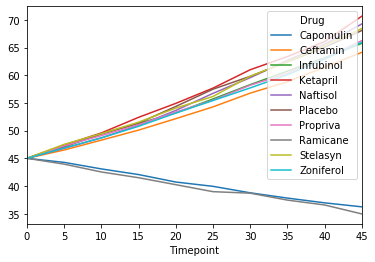

In [16]:
mean_unstacked_df[("Tumor Volume (mm3)")].plot()

## Survival Rates

In [17]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
drug_tp_count = drug_tp_groupby.count()


# Convert to DataFrame
drop_tum_met_count = drug_tp_count.drop(["Metastatic Sites","Tumor Volume (mm3)"], axis = 1)
# Preview DataFrame
mouse_count=drop_tum_met_count.reset_index()
mouse_count.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [18]:
# Minor Data Munging to Re-Format the Data Frames
mouse_count_df = drop_tum_met_count.unstack("Drug")
# Preview the Data Frame
mouse_count_df[("Mouse ID")].head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [19]:
mouse_survival_df = mouse_count_df[("Mouse ID")]/25*100
mouse_survival_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,104.0,100.0,104.0,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,100.0,100.0,100.0,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,92.0,96.0,92.0,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,68.0,96.0,92.0,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,68.0,92.0,84.0,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,56.0,92.0,76.0,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,52.0,92.0,72.0,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,40.0,84.0,64.0,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,36.0,80.0,48.0,56.0


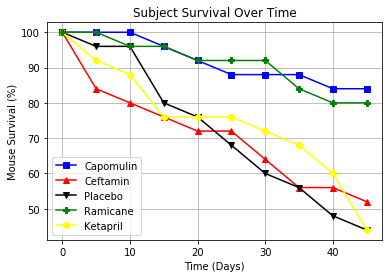

In [20]:
# Generate the Plot (Accounting for percentages)
plt.grid()
s_capomulin, = plt.plot(mouse_survival_df.loc[:,"Capomulin"],
                       marker = "s", color = "blue", label = "Capomulin")
s_ceftamin, = plt.plot(mouse_survival_df.loc[:,"Ceftamin"],
                       marker = "^", color = "red", label = "Ceftamin")
s_placebo, = plt.plot(mouse_survival_df.loc[:,"Placebo"],
                       marker = "v", color = "black", label = "Placebo")
s_ketapril, = plt.plot(mouse_survival_df.loc[:,"Ketapril"],
                       marker = "8", color = "yellow", label = "Ketapril")
s_ramicane, = plt.plot(mouse_survival_df.loc[:,"Ramicane"],
                       marker = "P", color = "green", label = "Ramicane")
plt.xlabel("Time (Days)")
plt.ylabel("Mouse Survival (%)")
plt.title("Subject Survival Over Time")
plt.legend(handles = [s_capomulin, s_ceftamin, s_placebo, s_ramicane, s_ketapril])
# Save the Figure
plt.savefig("../Figures/Mouse_survival.png")
# Show the Figure
plt.show()

## Summary Bar Graph

In [21]:
# Calculate the percent changes for each drug
tumor_vol_mean = mean_unstacked_df[("Tumor Volume (mm3)")]
percent_change_df = tumor_vol_mean.pct_change(periods=9)*100


# Display the data to confirm
percent_change_df.loc[45,:]

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
Name: 45, dtype: float64

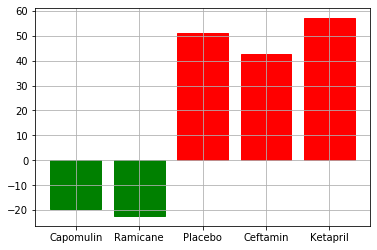

In [23]:
# Store all Relevant Percent Changes into a Tuple
percent_change_list = [percent_change_df.loc[45,"Capomulin"],
                        percent_change_df.loc[45,"Ramicane"],
                        percent_change_df.loc[45,"Placebo"],
                        percent_change_df.loc[45,"Ceftamin"], 
                        percent_change_df.loc[45,"Ketapril"],
                       ] 
x_axis = ["Capomulin","Ramicane","Placebo","Ceftamin", "Ketapril"]
# Splice the data between passing and failing drugs
plt.grid()
barlist = plt.bar(x_axis, percent_change_list)
barlist[0].set_color("green")
barlist[1].set_color("green")
barlist[2].set_color("red")
barlist[3].set_color("red")
barlist[4].set_color("red")
# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
